In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,accuracy_score
import pickle

In [3]:
data=pd.read_csv('evdataset.csv')
data.head()

,id,Brand,link,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,...,Charge Speed,Fastcharge Speed,Length,Width,Height,Wheelbase,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Seats
0,1647,Genesis,https://ev-database.org/car/1647/Genesis-GV60-...,390,275,330,575,355,445,7.8,...,49,1020,4515,1890,1580,2900,2495,595,432,5
1,1493,Mercedes,https://ev-database.org/car/1493/Mercedes-EQB-...,330,235,280,480,300,375,6.2,...,46,470,4684,1834,1701,2829,2580,480,495,7
2,1229,Porsche,https://ev-database.org/car/1229/Porsche-Tayca...,400,305,350,580,385,470,3.2,...,46,1020,4963,1966,1381,2900,2880,575,366,4
3,1252,BMW,https://ev-database.org/car/1252/BMW-i4-eDrive40,445,340,390,670,440,540,5.7,...,54,730,4783,1852,1448,2856,2605,555,470,5
4,1534,Volkswagen,https://ev-database.org/car/1534/Volkswagen-ID...,440,320,380,660,415,520,7.9,...,55,570,4261,1809,1568,2771,2300,447,385,5


In [4]:
data.columns

Index(['id', 'Brand', 'link', 'City - Cold Weather', 'Highway - Cold Weather',
       'Combined - Cold Weather', 'City - Mild Weather',
       'Highway - Mild Weather', 'Combined - Mild Weather',
       'Acceleration 0 - 100 km/h', 'Top Speed', 'Electric Range',
       'Total Power', 'Total Torque', 'Drive', 'Battery Capacity',
       'Charge Power', 'Charge Speed', 'Fastcharge Speed', 'Length', 'Width',
       'Height', 'Wheelbase', 'Gross Vehicle Weight (GVWR)', 'Max. Payload',
       'Cargo Volume', 'Seats'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           194 non-null    int64  
 1   Brand                        194 non-null    object 
 2   link                         194 non-null    object 
 3   City - Cold Weather          194 non-null    int64  
 4   Highway - Cold Weather       194 non-null    int64  
 5   Combined - Cold Weather      194 non-null    int64  
 6   City - Mild Weather          194 non-null    int64  
 7   Highway - Mild Weather       194 non-null    int64  
 8   Combined - Mild Weather      194 non-null    int64  
 9   Acceleration 0 - 100 km/h    194 non-null    float64
 10  Top Speed                    194 non-null    int64  
 11  Electric Range               194 non-null    int64  
 12  Total Power                  194 non-null    int64  
 13  Total Torque        

In [6]:
data.shape
data.isnull().sum()

id                             0
Brand                          0
link                           0
City - Cold Weather            0
Highway - Cold Weather         0
Combined - Cold Weather        0
City - Mild Weather            0
Highway - Mild Weather         0
Combined - Mild Weather        0
Acceleration 0 - 100 km/h      0
Top Speed                      0
Electric Range                 0
Total Power                    0
Total Torque                   0
Drive                          0
Battery Capacity               0
Charge Power                   0
Charge Speed                   0
Fastcharge Speed               0
Length                         0
Width                          0
Height                         0
Wheelbase                      0
Gross Vehicle Weight (GVWR)    0
Max. Payload                   0
Cargo Volume                   0
Seats                          0
dtype: int64

In [7]:
data.dtypes

id                               int64
Brand                           object
link                            object
City - Cold Weather              int64
Highway - Cold Weather           int64
Combined - Cold Weather          int64
City - Mild Weather              int64
Highway - Mild Weather           int64
Combined - Mild Weather          int64
Acceleration 0 - 100 km/h      float64
Top Speed                        int64
Electric Range                   int64
Total Power                      int64
Total Torque                     int64
Drive                           object
Battery Capacity               float64
Charge Power                   float64
Charge Speed                     int64
Fastcharge Speed                 int64
Length                           int64
Width                            int64
Height                           int64
Wheelbase                        int64
Gross Vehicle Weight (GVWR)      int64
Max. Payload                     int64
Cargo Volume             

In [8]:
data.nunique()

id                             194
Brand                           34
link                           194
City - Cold Weather             64
Highway - Cold Weather          52
Combined - Cold Weather         57
City - Mild Weather             82
Highway - Mild Weather          59
Combined - Mild Weather         67
Acceleration 0 - 100 km/h       72
Top Speed                       29
Electric Range                  66
Total Power                     65
Total Torque                    69
Drive                            3
Battery Capacity                49
Charge Power                     5
Charge Speed                    37
Fastcharge Speed                69
Length                          74
Width                           51
Height                          76
Wheelbase                       54
Gross Vehicle Weight (GVWR)    122
Max. Payload                   110
Cargo Volume                    74
Seats                            5
dtype: int64

In [10]:
#Checking for null values

data.nunique()

id                             194
Brand                           34
link                           194
City - Cold Weather             64
Highway - Cold Weather          52
Combined - Cold Weather         57
City - Mild Weather             82
Highway - Mild Weather          59
Combined - Mild Weather         67
Acceleration 0 - 100 km/h       72
Top Speed                       29
Electric Range                  66
Total Power                     65
Total Torque                    69
Drive                            3
Battery Capacity                49
Charge Power                     5
Charge Speed                    37
Fastcharge Speed                69
Length                          74
Width                           51
Height                          76
Wheelbase                       54
Gross Vehicle Weight (GVWR)    122
Max. Payload                   110
Cargo Volume                    74
Seats                            5
dtype: int64

In [11]:
data.shape

(194, 27)

In [12]:
#Converting categorical data into numerical data

data.replace({'Drive':{'Rear':2,'Front':0,'AWD':1}},inplace=True)

In [13]:
#Dropping few features

cols_to_use=['City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather','Combined - Mild Weather','Acceleration 0 - 100 km/h','Top Speed','Electric Range','Total Power','Total Torque','Drive','Battery Capacity','Charge Power','Charge Speed','Fastcharge Speed','Gross Vehicle Weight (GVWR)','Max. Payload','Cargo Volume','Width','Length']
data=data[cols_to_use]
data.head()

,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather,Acceleration 0 - 100 km/h,Top Speed,Electric Range,Total Power,...,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Width,Length
0,390,275,330,575,355,445,7.8,185,390,168,...,2,77.4,11.0,49,1020,2495,595,432,1890,4515
1,330,235,280,480,300,375,6.2,160,330,215,...,1,69.7,11.0,46,470,2580,480,495,1834,4684
2,400,305,350,580,385,470,3.2,260,415,500,...,1,93.4,11.0,46,1020,2880,575,366,1966,4963
3,445,340,390,670,440,540,5.7,190,470,250,...,2,83.9,11.0,54,730,2605,555,470,1852,4783
4,440,320,380,660,415,520,7.9,160,450,150,...,2,82.0,11.0,55,570,2300,447,385,1809,4261


In [14]:
data.isna().sum()

City - Cold Weather            0
Highway - Cold Weather         0
Combined - Cold Weather        0
City - Mild Weather            0
Highway - Mild Weather         0
Combined - Mild Weather        0
Acceleration 0 - 100 km/h      0
Top Speed                      0
Electric Range                 0
Total Power                    0
Total Torque                   0
Drive                          0
Battery Capacity               0
Charge Power                   0
Charge Speed                   0
Fastcharge Speed               0
Gross Vehicle Weight (GVWR)    0
Max. Payload                   0
Cargo Volume                   0
Width                          0
Length                         0
dtype: int64

In [15]:
x=data.drop(['Electric Range','City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather',
'Combined - Mild Weather'],axis=1)
y=data[['Electric Range','City - Cold Weather','Highway - Cold Weather','Combined - Cold Weather','City - Mild Weather','Highway - Mild Weather',
'Combined - Mild Weather']]

In [16]:
x.shape

(194, 14)

In [17]:
x

,Acceleration 0 - 100 km/h,Top Speed,Total Power,Total Torque,Drive,Battery Capacity,Charge Power,Charge Speed,Fastcharge Speed,Gross Vehicle Weight (GVWR),Max. Payload,Cargo Volume,Width,Length
0,7.8,185,168,350,2,77.4,11.0,49,1020,2495,595,432,1890,4515
1,6.2,160,215,520,1,69.7,11.0,46,470,2580,480,495,1834,4684
2,3.2,260,500,850,1,93.4,11.0,46,1020,2880,575,366,1966,4963
3,5.7,190,250,430,2,83.9,11.0,54,730,2605,555,470,1852,4783
4,7.9,160,150,310,2,82.0,11.0,55,570,2300,447,385,1809,4261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,2.8,260,560,1050,1,93.4,11.0,45,980,2870,575,366,1966,4963
190,7.9,160,150,310,2,82.0,11.0,55,570,2280,420,385,1809,4261
191,11.7,135,100,260,0,50.0,7.4,27,310,2440,639,806,1921,4753
192,6.2,180,220,460,1,82.0,11.0,49,500,2715,575,535,1865,4588


In [18]:
#Normalizing the given data

from sklearn import preprocessing
x=preprocessing.normalize(x)

In [19]:
x

array([[1.37978718e-03, 3.27257217e-02, 2.97184932e-02, ...,
        7.64189825e-02, 3.34333049e-01, 7.98684505e-01],
       [1.07919159e-03, 2.78501057e-02, 3.74235795e-02, ...,
        8.61612644e-02, 3.19231836e-01, 8.15311844e-01],
       [5.10145768e-04, 4.14493436e-02, 7.97102762e-02, ...,
        5.83479222e-02, 3.13420806e-01, 7.91204202e-01],
       ...,
       [2.02180966e-03, 2.33285730e-02, 1.72804244e-02, ...,
        1.39280221e-01, 3.31956953e-01, 8.21338572e-01],
       [1.07817561e-03, 3.13018724e-02, 3.82578441e-02, ...,
        9.30361209e-02, 3.24322178e-01, 7.97849949e-01],
       [2.27538052e-03, 2.06852775e-02, 1.59117519e-02, ...,
        9.59478640e-02, 3.05505637e-01, 7.88586424e-01]])

In [20]:
y

,Electric Range,City - Cold Weather,Highway - Cold Weather,Combined - Cold Weather,City - Mild Weather,Highway - Mild Weather,Combined - Mild Weather
0,390,390,275,330,575,355,445
1,330,330,235,280,480,300,375
2,415,400,305,350,580,385,470
3,470,445,340,390,670,440,540
4,450,440,320,380,660,415,520
...,...,...,...,...,...,...,...
189,400,390,290,340,560,370,450
190,450,440,320,380,660,415,515
191,195,210,140,170,295,170,220
192,400,395,290,340,580,370,460


In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [22]:
#Using Linear Regression

from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(X_train,Y_train)
#Model Evaluation (Regression Metrics)
# Calculate the score for Training Data
reg.score(X_train, Y_train)
print("R2 for Training Data: ", reg.score(X_train, Y_train))
reg.score(X_test, Y_test)
print("R2 for testing: ",reg.score(X_test,Y_test))

R2 for Training Data:  0.9835064447106875
R2 for testing:  0.9807699956982461


In [23]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming reg is your trained linear regression model

# Fit the linear regression model
reg = LinearRegression().fit(X_train, Y_train)

# Predictions on the training and testing sets
y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [31]:
import numpy as np
X_train = np.array(X_train)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
y_train_pred = np.array(y_train_pred)
y_test_pred = np.array(y_test_pred)

print(np.max(X_train))
print(np.max(Y_train))
print(np.max(Y_test))
print(np.max(y_train_pred))
print(np.max(y_test_pred))

print(X_train)

0.8669899586475637
895
685
869.6123737007911
675.519581683553
[[0.00132146 0.03020489 0.0320927  ... 0.07268052 0.34150405 0.81590963]
 [0.00138933 0.02963907 0.02778663 ... 0.06798462 0.3408493  0.83267261]
 [0.00131699 0.02847536 0.03025507 ... 0.07207825 0.3203478  0.81991239]
 ...
 [0.00198841 0.01973235 0.01517873 ... 0.15011763 0.29143161 0.80583875]
 [0.00087321 0.03719231 0.056597   ... 0.07212074 0.31791342 0.80254541]
 [0.00135014 0.02919232 0.03101683 ... 0.07644738 0.34173254 0.80734996]]


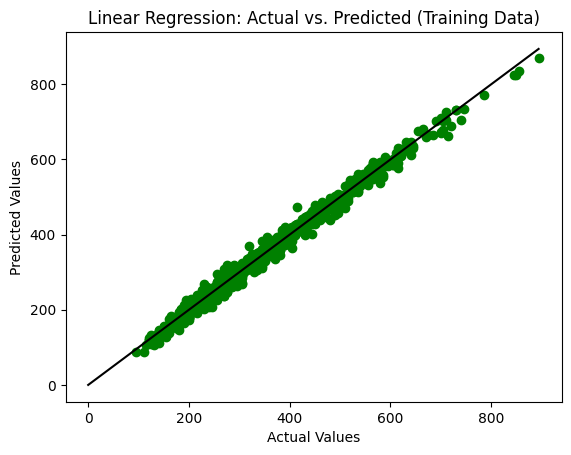

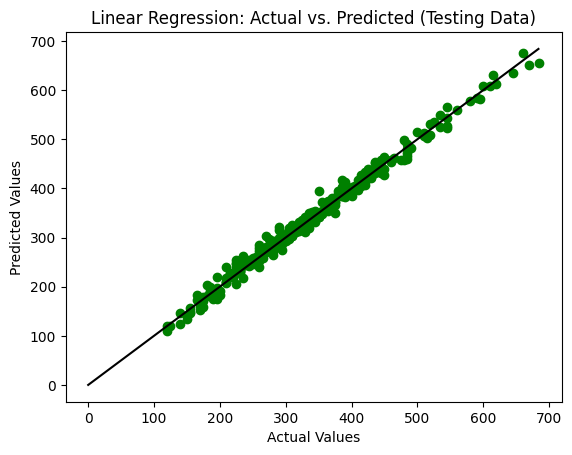

In [34]:
"""
def plotGraph(y_test,y_pred,regressorName):
    if max(y_test) >= max(y_pred):
        my_range = int(max(y_test))
    else:
        my_range = int(max(y_pred))
    plt.scatter(y_test, y_pred, color='red')
    plt.plot(range(my_range), range(my_range), 'o')
    plt.title(regressorName)
    plt.show()
    return
"""

# Scatter plot for Training Data
plt.scatter(Y_train, y_train_pred, color='green')
plt.plot(range(895), range(895), color='black')
plt.title('Linear Regression: Actual vs. Predicted (Training Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Scatter plot for Testing Data
plt.scatter(Y_test, y_test_pred, color='green')
plt.plot(range(685), range(685), color='black')
plt.title('Linear Regression: Actual vs. Predicted (Testing Data)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [35]:
# Assuming X_train and Y_train are your training data
from sklearn.linear_model import LinearRegression

# Create and fit the linear regression model
reg = LinearRegression().fit(X_train, Y_train)

# Get the coefficients
coefficients = reg.coef_

# Print the coefficients
print("Coefficients:", coefficients[0])

Coefficients: [ 7.92649909e+03 -1.99802273e+02  2.74761125e+02  5.10284708e+02
  1.72242403e+04  2.69989630e+04 -1.82215325e+05  3.84960925e+04
  5.90539581e+02  1.58393440e+03  1.43989016e+02  4.31806062e+02
 -9.87109374e+01  3.14059649e+03]


In [36]:
pickle.dump(reg, open('model.pkl','wb'))

In [37]:
testing_data_prediction = reg.predict(X_test)
testing_data_prediction = np.array(testing_data_prediction)
print(np.max(testing_data_prediction))
print(np.max(Y_test))

675.519581683553
685


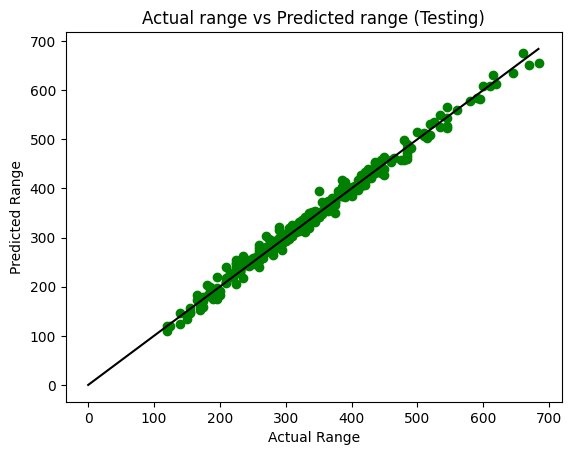

In [38]:
plt.scatter(Y_test,testing_data_prediction, color='green')
plt.plot(range(685), range(685), color='black')
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range (Testing)")
plt.show()

In [39]:
mae = mean_absolute_error(Y_test,testing_data_prediction)
mae

8.955062916841213

In [40]:
from sklearn.metrics import mean_squared_error

# Assuming Y_test and testing_data_prediction are your actual and predicted values
mse = mean_squared_error(Y_test, testing_data_prediction)

print("Mean Squared Error:", mse)

Mean Squared Error: 137.56152998043328


In [41]:
from sklearn.metrics import mean_squared_error
import math

# Assuming Y_test and testing_data_prediction are your actual and predicted values
mse = mean_squared_error(Y_test, testing_data_prediction)
rmse = math.sqrt(mse)

print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 11.7286627532909


In [43]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs={
    'n_estimators':randint(low=1,high=200),
    'max_features':randint(low=1,high=15),
}

forest_reg=RandomForestRegressor(random_state=42)
rnd_search=RandomizedSearchCV(forest_reg,param_distributions=param_distribs,n_iter=10,cv=5,scoring="neg_mean_squared_error",
                              random_state=42)
rnd_search.fit(X_train,Y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025EF8EB4450>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000025EF8ED5CD0>},
                   random_state=42, scoring='neg_mean_squared_error')

In [44]:
testing_data_prediction1 = rnd_search.predict(X_test)
testing_data_prediction1 = np.array(testing_data_prediction1)
print(np.max(testing_data_prediction1))
print(np.max(Y_test))

682.9605263157895
685


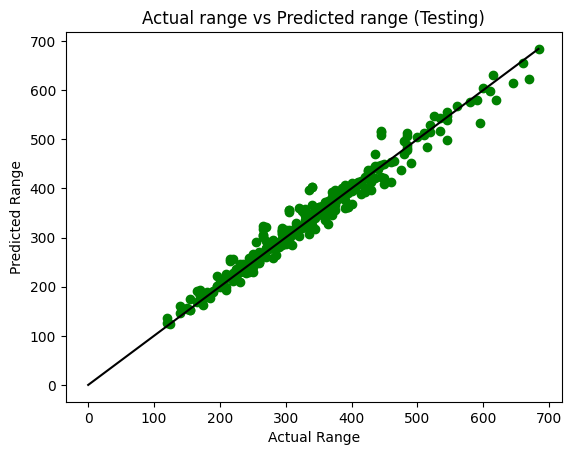

In [45]:
plt.scatter(Y_test,testing_data_prediction1, color = 'green')
plt.plot(range(685), range(685), color='black')
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range (Testing)")
plt.show()

In [46]:
mae1 = mean_absolute_error(Y_test,testing_data_prediction1)
mae1

14.015206284943128

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid=[
        {'n_estimators':[3,10,30],'max_features':[2,4,6,8]},
        {'bootstrap':[False],'n_estimators':[3,10],'max_features':[2,3,4]},
]

rfc=RandomForestClassifier()
grid_search=GridSearchCV(rfc,param_grid,cv=5,scoring="neg_mean_squared_error",
                              return_train_score=True)
grid_search.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [48]:
rfc_clf=grid_search.best_estimator_
rfc_clf

RandomForestClassifier(max_features=8, n_estimators=30)

In [49]:
rfc_clf_predictions=rfc_clf.predict(X_test)

In [50]:
testing_data_prediction2=rfc_clf.predict(X_test)
testing_data_prediction2 = np.array(testing_data_prediction2)
print(np.max(testing_data_prediction2))
print(np.max(Y_test))

675
685


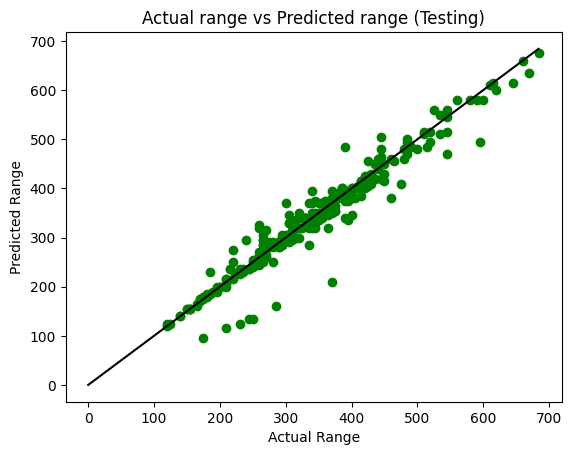

In [62]:
plt.scatter(Y_test,testing_data_prediction2, color = 'green')
plt.plot(range(685), range(685), color='black')
plt.xlabel("Actual Range")
plt.ylabel("Predicted Range")
plt.title("Actual range vs Predicted range (Testing)")
plt.show()

In [52]:
mae2 = mean_absolute_error(Y_test,rfc_clf_predictions)
mae2

15.952380952380953

In [53]:
from sklearn.tree import DecisionTreeRegressor

tree_reg=DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train,Y_train)

DecisionTreeRegressor(random_state=42)

In [54]:
from sklearn.metrics import r2_score

# Assuming tree_reg is your trained Decision Tree Regressor
# Training set
y_train_pred = tree_reg.predict(X_train)
r2_train = r2_score(Y_train, y_train_pred)
print("R2 Score for Training Data:", r2_train)

# Testing set
y_test_pred = tree_reg.predict(X_test)
r2_test = r2_score(Y_test, y_test_pred)
print("R2 Score for Testing Data:", r2_test)

R2 Score for Training Data: 1.0
R2 Score for Testing Data: 0.9359052528548403


In [55]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Assuming tree_reg is your trained Decision Tree Regressor
y_pred = tree_reg.predict(X_test)
# Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, y_pred)
print("Mean Squared Error:", mse)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 470.5128205128205
Root Mean Squared Error: 21.691307487397353


In [56]:
testing_data_prediction3=tree_reg.predict(X_test)
mae3 = mean_absolute_error(Y_test,testing_data_prediction3)
mae3

14.505494505494507

In [57]:
from sklearn.ensemble import RandomForestRegressor

forest_reg=RandomForestRegressor(n_estimators=100,random_state=42)
forest_reg.fit(X_train,Y_train)

RandomForestRegressor(random_state=42)

In [58]:
testing_data_prediction4=forest_reg.predict(X_test)
mae4 = mean_absolute_error(Y_test,testing_data_prediction4)
mae4

15.524175824175826

In [59]:
from sklearn.metrics import r2_score

# Assuming forest_reg is your trained RandomForestRegressor
# Training set
y_train_pred = forest_reg.predict(X_train)
r2_train = r2_score(Y_train, y_train_pred)
print("R2 Score for Training Data:", r2_train)

# Testing set
y_test_pred = forest_reg.predict(X_test)
r2_test = r2_score(Y_test, y_test_pred)
print("R2 Score for Testing Data:", r2_test)

R2 Score for Training Data: 0.9949901155544583
R2 Score for Testing Data: 0.9153077305568518


In [60]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming forest_reg is your trained RandomForestRegressor
# Testing set
y_test_pred = forest_reg.predict(X_test)
mse_test = mean_squared_error(Y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
print("Mean Squared Error (MSE) for Testing Data:", mse_test)
print("Root Mean Squared Error (RMSE) for Testing Data:", rmse_test)

Mean Squared Error (MSE) for Testing Data: 620.1572344322345
Root Mean Squared Error (RMSE) for Testing Data: 24.90295633920267
